# Homework 01

In [34]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

## 1

Suppose the globe tossing data (Chapter 2) had turned out to be 4 water
in 15 tosses. Construct the posterior distribution, using grid approximation.
Use the same flat prior as in the book.

In [56]:
# copy from 2.4.3 in My_Chapter02 notebook
grid_points = int(1e4)
p_grid = np.linspace(start=0, stop=1, num=grid_points)
prior = np.repeat(a=1, repeats=grid_points) # probability = 1 for all values of p

# likelihood is different because the data is different
success = 4  # success define as water
trials = 15
likelihood = stats.binom.pmf(k=success, n=trials, p=p_grid)

# rest is the same
unstd_post = likelihood * prior
# standardize posterior
posterior = unstd_post/sum(unstd_post)

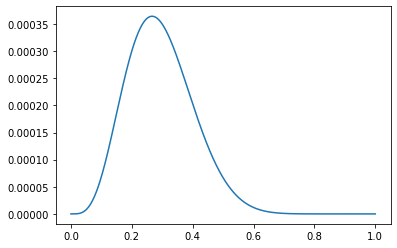

In [74]:
sns.lineplot(x=p_grid, y=posterior, style=True, legend=False, markers=False);

In [58]:
success/trials

0.26666666666666666

## 2

Start over in 1, but now use a prior that is zero below p = 0:5 and a constant
above p = 0:5. This corresponds to prior information that a majority
of the Earth’s surface is water. What difference does the better prior make?

In [59]:
prior2 = [0 if x <= 0.5 else 1 for x in p_grid]

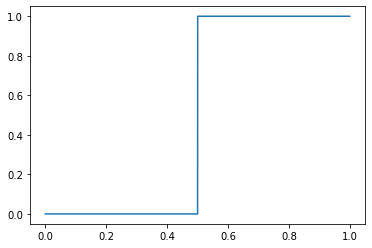

In [60]:
sns.lineplot(x=p_grid, y=prior2);

The likelihood is the probability of the outcome (data) for each value of  _p_.  It is unchanged.  All that is changed is the prior:

Bayes rule:

P(A|B) = P(A,B)/P(B)

P(A|B) = P(B|A)P(A)/P(B)

And for P(B), it is the sum P(B|A)P(A) for all A

P(p|data) = p(data|p)P(p)/sum(P(data|p)P(p) for all p

P(data|p) is the probability of an outcome in the binomial given the parameter $p$ (other distributions have other parameters, like $\mu$ and $\sigma$). Probability of the observed data conditional on the model.

In [61]:
# rest is the same
unstd_post2 = likelihood * prior2  # a vector for every value of p
# standardize posterior
posterior2 = unstd_post2/sum(unstd_post2) # a normalized vector

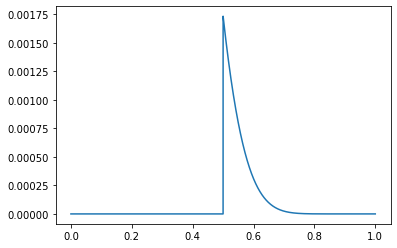

In [75]:
sns.lineplot(x=p_grid, y=posterior2, style=True, legend=False, markers=False);

Richard says this is a better answer.  Better priors give better answers.  So we can always use knowledge about the world to construct better priors than flat.

## 3

For the posterior distribution from 2, compute 89% percentile and HPDI
intervals. Compare the widths of these intervals. Which is wider? Why? If
you had only the information in the interval, what might you misunderstand
about the shape of the posterior distribution?

The key to this one is `np.random.choice`

Remember that scientific notation (1e4) is interpreted as a float and needs to be cast as a integer.

In [63]:
samples2 = np.random.choice(p_grid, p=posterior2, size=int(1e4), replace=True)

In [80]:
samples2

array([0.62986299, 0.54725473, 0.51665167, ..., 0.52215222, 0.6119612 ,
       0.51125113])

[(0.0, 1.0)]

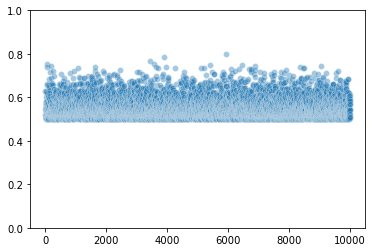

In [89]:
ax=sns.scatterplot(x=range(len(samples2)), y=samples2, alpha=0.4);
ax.set(ylim=(0,1))

In [86]:
range(len(samples2))

range(0, 10000)

In [64]:
np.percentile(samples2, 80)

0.580958095809581

This means 80% of the data is less that 0.58

In [65]:
np.percentile(samples2, [5.5, 94.5])

array([0.50315032, 0.63226873])

One problem with this interval is that it does not include the mode (0.5).

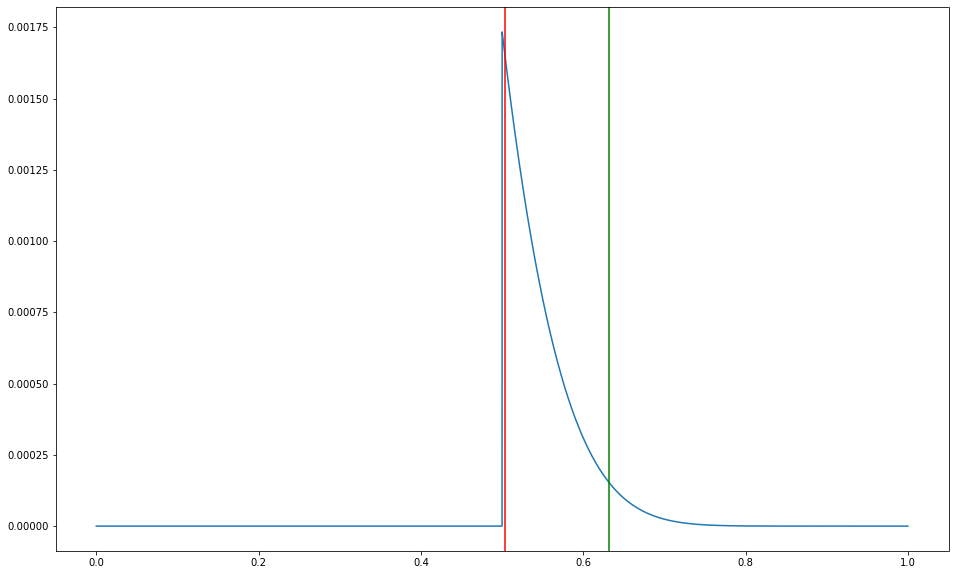

In [76]:
plt.figure(figsize=(16,10))
ax=sns.lineplot(x=p_grid, y=posterior2, style=True, legend=False, markers=False);
ax.axvline(x=np.percentile(samples2, 5.5), color="r");
ax.axvline(x=np.percentile(samples2, 94.5), color="g");

Now calculate the HPDI (highest posterior density interval). Need Arviz for this.

In [67]:
az.hdi(samples2, hdi_prob=0.89)

array([0.50005001, 0.60486049])

In [73]:
sum(samples2 < 0.50251256)/int(1e4)

0.0433